In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import sparse
from scipy.sparse import linalg as spla
import spectral

## Non-Fully Periodic BVP

In [2]:
N = 32
x_basis = spectral.Fourier(N)
y_basis = spectral.Chebyshev(N)
domain = spectral.Domain([x_basis, y_basis])
u = spectral.Field(domain)
v = spectral.Field(domain)
x, y = domain.grids()
xm, ym = np.meshgrid(x.ravel(), y.ravel())

In [11]:
problem = spectral.BoundaryValueProblem(domain, [u, v], num_BCs=4)

In [12]:
diag = np.arange(N-1) + 1
D = sparse.diags(diag, offsets=1)

diag0 = np.ones(N)/2
diag0[0] = 1
diag2 = -np.ones(N-2)/2
C = sparse.diags((diag0, diag2), offsets=(0, 2))

Z = sparse.csr_matrix((N, N))

In [13]:
for p in problem.pencils:
    n = p.wavenumbers[0]
    
    L = sparse.bmat([[ -D,    Z,   Z, -n*C],
                     [  Z,   -D, n*C,    Z],
                     [n*C,    Z,   Z,    D],
                     [  Z, -n*C,   D,    Z]])
    
    BC_rows = np.zeros((4, 4*N))
    i = np.arange(N)
    BC_rows[0, 3*N:4*N] = (-1)**i
    BC_rows[1, 2*N:3*N] = (-1)**i
    BC_rows[2, 3*N:4*N] = (+1)**i
    BC_rows[3, 2*N:3*N] = (+1)**i
    
    cols = np.zeros((4*N, 4))
    cols[  N-1, 0] = 1
    cols[2*N-1, 1] = 1
    cols[3*N-1, 2] = 1
    cols[4*N-1, 3] = 1
    
    corner = np.zeros((4,4))
    
    p.L = sparse.bmat([[L, cols],
                       [BC_rows, corner]])

<IPython.core.display.Javascript object>


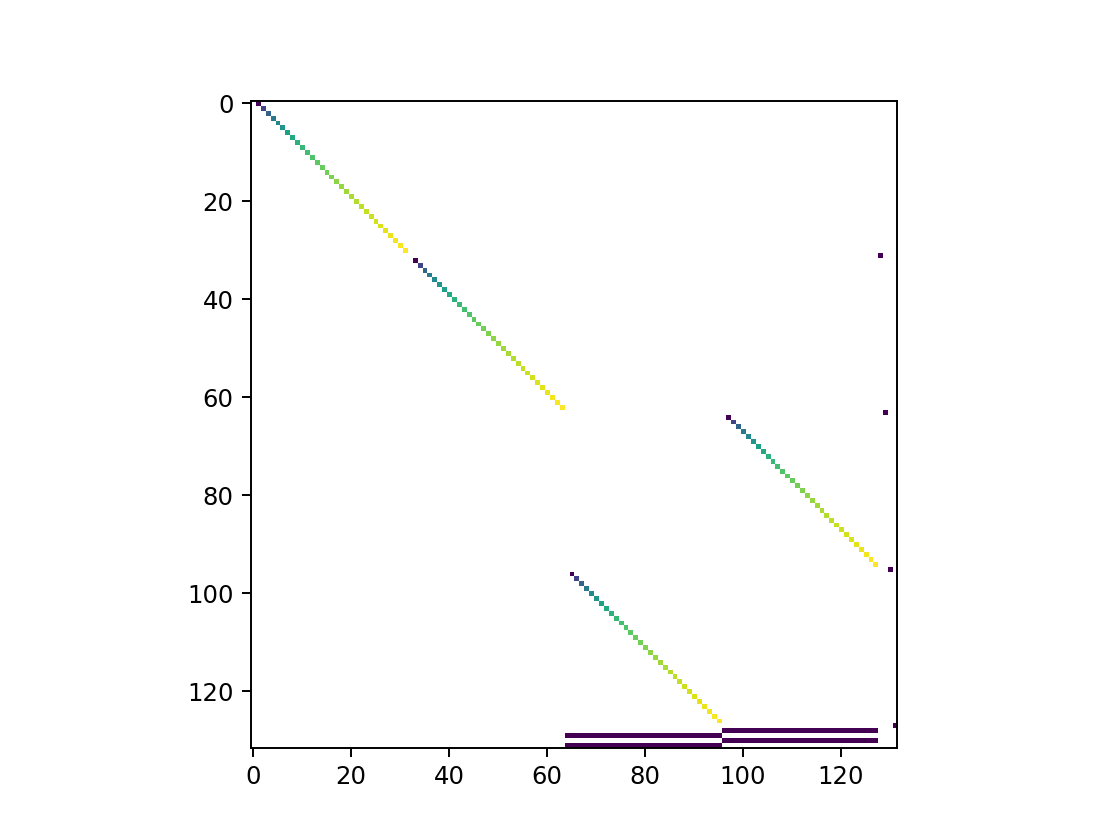

/var/folders/8j/kcmh8b0d37lgd3dff3rz5wsc0000gn/T/ipykernel_85882/1247603200.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(problem.pencils[0].L.A)))


In [15]:
plt.figure()
plt.imshow(np.log(np.abs(problem.pencils[0].L.A)))